Mounted at /content/drive
✅ Libraries imported successfully
🔧 PyTorch: 2.8.0+cu126, CUDA: True

📦 EXTRACTING AVLIPS DATASET
⏳ Extracting...
✅ Extracted in 186.5 seconds
✅ Config loaded: cuda
🔥 Effective Batch Size: 256
📊 TRANSFORMER V1: MobileNetV3-Small CNNs + Transformer

STEP 1: PREPARING FILE LISTS
🔥 Sampling 2000 videos per class...
Train: 2800 | Val: 600 | Test: 600

STEP 2: CACHING DATA INTO RAM


Caching Test: 100%|██████████| 10/10 [05:15<00:00, 31.54s/it]


✅ Caching complete! Train: 1383, Val: 265, Test: 310

STEP 3: CREATING DATALOADERS
✅ DataLoaders created

STEP 4: BUILDING TRANSFORMER MODEL
Downloading: "https://download.pytorch.org/models/mobilenet_v3_small-047dcff4.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v3_small-047dcff4.pth


100%|██████████| 9.83M/9.83M [00:00<00:00, 125MB/s]


📊 Transformer Model Statistics:
   Total Parameters: 8,600,129
   Trainable: 8,600,129
   Size: 32.92 MB
   Parameters: 8.600M

STEP 5: TRAINING TRANSFORMER MODEL
🚀 Starting training for 25 epochs...

--- Epoch 1/25 ---


Validating: 100%|██████████| 5/5 [00:04<00:00,  1.04it/s]


Epoch 1 - Train Loss: 0.7095, Val Loss: 0.6931, LR: 5.00e-05
🏆 New best model saved! Val Loss: 0.6931

--- Epoch 2/25 ---


Validating: 100%|██████████| 5/5 [00:01<00:00,  2.62it/s]


Epoch 2 - Train Loss: 0.6875, Val Loss: 0.6917, LR: 5.00e-05
🏆 New best model saved! Val Loss: 0.6917

--- Epoch 3/25 ---


Validating: 100%|██████████| 5/5 [00:01<00:00,  2.55it/s]


Epoch 3 - Train Loss: 0.6665, Val Loss: 0.6835, LR: 5.00e-05
🏆 New best model saved! Val Loss: 0.6835

--- Epoch 4/25 ---


Validating: 100%|██████████| 5/5 [00:01<00:00,  2.76it/s]


Epoch 4 - Train Loss: 0.6514, Val Loss: 0.6723, LR: 5.00e-05
🏆 New best model saved! Val Loss: 0.6723

--- Epoch 5/25 ---


Validating: 100%|██████████| 5/5 [00:01<00:00,  2.74it/s]


Epoch 5 - Train Loss: 0.6157, Val Loss: 0.6646, LR: 5.00e-05
🏆 New best model saved! Val Loss: 0.6646

--- Epoch 6/25 ---


Validating: 100%|██████████| 5/5 [00:01<00:00,  2.62it/s]


Epoch 6 - Train Loss: 0.5600, Val Loss: 0.6590, LR: 5.00e-05
🏆 New best model saved! Val Loss: 0.6590

--- Epoch 7/25 ---


Validating: 100%|██████████| 5/5 [00:01<00:00,  2.67it/s]


Epoch 7 - Train Loss: 0.4969, Val Loss: 0.6696, LR: 5.00e-05

--- Epoch 8/25 ---


Validating: 100%|██████████| 5/5 [00:01<00:00,  2.54it/s]


Epoch 8 - Train Loss: 0.4791, Val Loss: 0.7821, LR: 5.00e-05

--- Epoch 9/25 ---


Validating: 100%|██████████| 5/5 [00:01<00:00,  2.76it/s]


Epoch 9 - Train Loss: 0.4218, Val Loss: 0.7106, LR: 5.00e-05

--- Epoch 10/25 ---


Validating: 100%|██████████| 5/5 [00:01<00:00,  2.73it/s]


Epoch 10 - Train Loss: 0.3757, Val Loss: 0.8347, LR: 5.00e-05

--- Epoch 11/25 ---


Validating: 100%|██████████| 5/5 [00:01<00:00,  2.55it/s]


Epoch 11 - Train Loss: 0.3767, Val Loss: 0.7698, LR: 2.50e-05

--- Epoch 12/25 ---


Validating: 100%|██████████| 5/5 [00:01<00:00,  2.67it/s]


Epoch 12 - Train Loss: 0.3571, Val Loss: 0.6989, LR: 2.50e-05
🛑 Early stopping at epoch 12

STEP 6: FINAL EVALUATION


Evaluation: 100%|██████████| 5/5 [00:52<00:00, 10.49s/it]



📈 TRANSFORMER V1: FINAL RESULTS
🎯 Accuracy: 0.6871 (68.71%)
📊 AUC Score: 0.7464 (74.64%)
📏 Model Size: 32.92 MB
🔢 Parameters: 8.600M

📋 Classification Report:
              precision    recall  f1-score   support

    Real (0)       0.66      0.71      0.68       148
    Fake (1)       0.72      0.67      0.69       162

    accuracy                           0.69       310
   macro avg       0.69      0.69      0.69       310
weighted avg       0.69      0.69      0.69       310



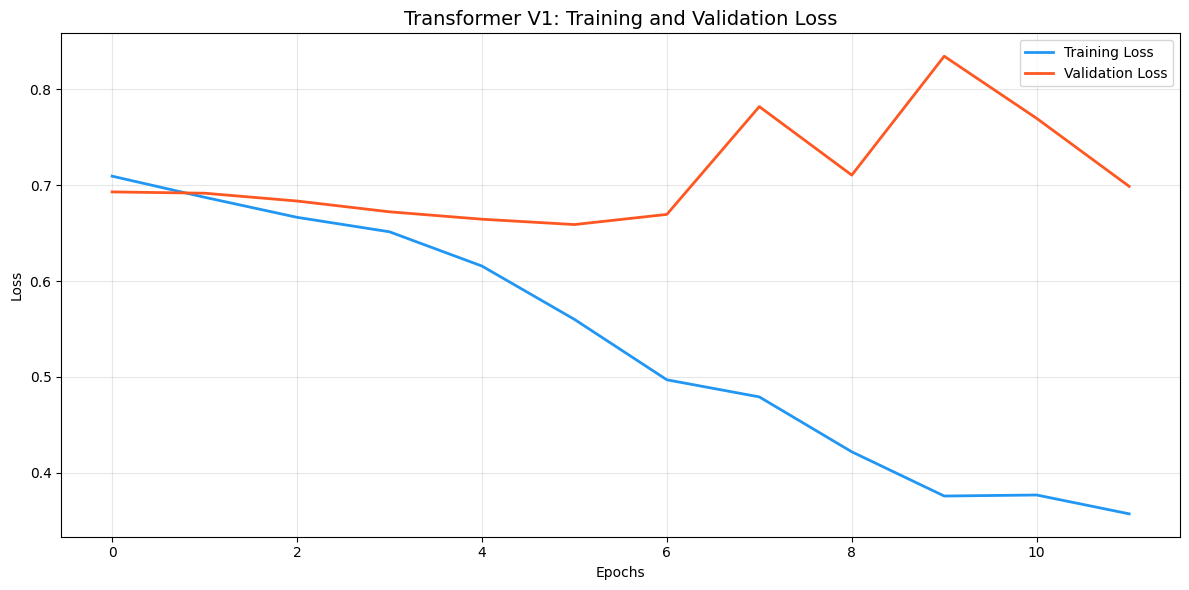


✅ Transformer V1 training completed!
📄 Model saved: /content/models/transformer_v1_best.pth
📊 Loss curve: /content/transformer_v1_loss_curve.png


In [1]:
# -*- coding: utf-8 -*-

"""
TRANSFORMER V1 VARIANT: Complete Training Script
MobileNetV3-Small CNNs + Transformer for temporal modeling
Optimized for Google Colab Pro (53GB RAM, 22.5GB VRAM)
"""

# ============================================================================
# STEP 1: MOUNT DRIVE & IMPORTS
# ============================================================================

from google.colab import drive
drive.mount('/content/drive')

import os
import cv2
import time
import torch
import zipfile
import librosa
import numpy as np
import torch.nn as nn
from pathlib import Path
from tqdm import tqdm
import torch.optim as optim
from torch.optim import lr_scheduler
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torchvision.models as models
from torch.cuda.amp import autocast, GradScaler
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
import warnings

warnings.filterwarnings('ignore')
torch.backends.cudnn.benchmark = True
print("✅ Libraries imported successfully")
print(f"🔧 PyTorch: {torch.__version__}, CUDA: {torch.cuda.is_available()}")

# ============================================================================
# STEP 2: EXTRACT AVLIPS DATASET
# ============================================================================

print("\n" + "="*80)
print("📦 EXTRACTING AVLIPS DATASET")
print("="*80)

zip_path = "/content/drive/MyDrive/CSE400 codes - 144/AVLips.zip"  # UPDATE IF NEEDED
extract_path = '/content/AVLips_data'

if not os.path.exists(extract_path):
    print(f"⏳ Extracting...")
    start_time = time.time()
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print(f"✅ Extracted in {time.time()-start_time:.1f} seconds")
else:
    print(f"✅ Already extracted")

# ============================================================================
# STEP 3: CONFIGURATION (OPTIMIZED FOR COLAB PRO)
# ============================================================================

class Config:
    def __init__(self):
        # Paths
        self.data_dir = "/content/AVLips_data/AVLips"
        self.model_save_dir = "/content/models/"
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        os.makedirs(self.model_save_dir, exist_ok=True)

        # Data Sampling
        self.use_sampling = True
        self.num_samples_per_class = 2000

        # Visual Stream
        self.vis_image_size = (128, 128)
        self.vis_num_frames = 16
        self.vis_cnn_feature_dim = 576  # MobileNetV3-Small
        self.vis_transformer_d_model = 256
        self.vis_transformer_nhead = 8
        self.vis_transformer_layers = 4
        self.vis_transformer_dropout = 0.1

        # Audio Stream
        self.aud_sample_rate = 16000
        self.aud_num_chunks = 5
        self.aud_chunk_duration = 1.0
        self.aud_n_mels = 128
        self.aud_cnn_feature_dim = 576  # MobileNetV3-Small
        self.aud_transformer_d_model = 256
        self.aud_transformer_nhead = 8
        self.aud_transformer_layers = 4
        self.aud_transformer_dropout = 0.1

        # Training (OPTIMIZED FOR 53GB RAM, 22.5GB VRAM)
        self.batch_size = 64  # Transformer is more memory-intensive than Mamba/LSTM
        self.accumulation_steps = 4  # Effective batch = 64*4 = 256
        self.epochs = 25
        self.learning_rate = 5e-5  # Lower for Transformer stability
        self.weight_decay = 0.05
        self.patience = 6
        self.gradient_clip = 1.0  # Moderate clipping for Transformer

config = Config()
print(f"✅ Config loaded: {config.device}")
print(f"🔥 Effective Batch Size: {config.batch_size * config.accumulation_steps}")
print(f"📊 TRANSFORMER V1: MobileNetV3-Small CNNs + Transformer")

# ============================================================================
# STEP 4: LABEL SMOOTHING LOSS
# ============================================================================

class LabelSmoothingBCELoss(nn.Module):
    def __init__(self, smoothing=0.1):
        super().__init__()
        self.smoothing = smoothing

    def forward(self, pred, target):
        target = target * (1 - self.smoothing) + 0.5 * self.smoothing
        return F.binary_cross_entropy_with_logits(pred, target)

# ============================================================================
# STEP 5: DATA PROCESSING
# ============================================================================

def process_visual_stream(video_path: str, config: Config):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        return None

    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    if total_frames < config.vis_num_frames:
        return None

    frame_indices = np.linspace(0, total_frames - 1, config.vis_num_frames, dtype=int)
    frames = []
    face_detector = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    for i in frame_indices:
        cap.set(cv2.CAP_PROP_POS_FRAMES, i)
        ret, frame = cap.read()
        if not ret:
            continue

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_detector.detectMultiScale(gray, 1.1, 4)

        if len(faces) > 0:
            (x, y, w, h) = faces[0]
            mouth_crop = frame[y + int(h * 0.6):y + h, x + int(w * 0.25):x + int(w * 0.75)]
            if mouth_crop.size > 0:
                resized_crop = cv2.resize(mouth_crop, config.vis_image_size)
                resized_crop_rgb = cv2.cvtColor(resized_crop, cv2.COLOR_BGR2RGB)
                frames.append(resized_crop_rgb)

    cap.release()
    return np.stack(frames) if len(frames) == config.vis_num_frames else None

def process_audio_stream(video_path: str, config: Config):
    try:
        parts = Path(video_path).parts
        audio_filename = Path(video_path).stem + ".wav"
        label_folder = parts[-2]
        base_data_dir = str(Path(video_path).parent.parent)
        audio_path = os.path.join(base_data_dir, "wav", label_folder, audio_filename)

        y, sr = librosa.load(audio_path, sr=config.aud_sample_rate)
        total_samples = int(config.aud_chunk_duration * config.aud_num_chunks * sr)

        if len(y) < total_samples:
            y = np.pad(y, (0, total_samples - len(y)), mode='constant')
        else:
            y = y[:total_samples]

        samples_per_chunk = int(config.aud_chunk_duration * sr)
        mel_list = []

        for i in range(config.aud_num_chunks):
            chunk = y[i*samples_per_chunk : (i+1)*samples_per_chunk]
            mel = librosa.feature.melspectrogram(y=chunk, sr=sr, n_mels=config.aud_n_mels)
            mel_db = librosa.power_to_db(mel, ref=np.max)
            mel_db = (mel_db - mel_db.mean()) / (mel_db.std() + 1e-9)
            mel_list.append(torch.tensor(mel_db, dtype=torch.float32))

        return torch.stack(mel_list, axis=0)
    except Exception:
        return None

# ============================================================================
# STEP 6: DATASET CLASSES
# ============================================================================

class DualStreamDataset(Dataset):
    def __init__(self, file_paths, labels, config):
        self.file_paths = file_paths
        self.labels = labels
        self.config = config

    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, idx):
        video_path = self.file_paths[idx]
        label = self.labels[idx]

        try:
            visual_frames_hwc = process_visual_stream(video_path, self.config)
            if visual_frames_hwc is None:
                return None

            visual_frames_tchw = visual_frames_hwc.transpose(0, 3, 1, 2)

            audio_mels = process_audio_stream(video_path, self.config)
            if audio_mels is None:
                return None

            audio_tensor = audio_mels.unsqueeze(1)

            return (visual_frames_tchw, audio_tensor), torch.tensor(label, dtype=torch.float32)
        except Exception:
            return None

class RAMCachedDataset(Dataset):
    def __init__(self, data, labels, transform=None):
        self.data = data
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        visual_frames_np, audio_tensor = self.data[idx]
        label = self.labels[idx]

        if self.transform:
            augmented_frames = []
            for frame_np in visual_frames_np:
                frame_hwc = frame_np.transpose(1, 2, 0)
                augmented_frames.append(self.transform(frame_hwc))
            visual_tensor = torch.stack(augmented_frames)
        else:
            visual_tensor = torch.from_numpy(visual_frames_np).float()

        return (visual_tensor, audio_tensor), label

# ============================================================================
# STEP 7: TRANSFORMER MODEL ARCHITECTURE
# ============================================================================

class PositionalEncoding(nn.Module):
    """Sinusoidal positional encoding for Transformer"""
    def __init__(self, d_model: int, max_len: int = 5000):
        super().__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-np.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        self.register_buffer('pe', pe)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        batch_size, seq_len, _ = x.shape
        return x + self.pe[:seq_len, :].unsqueeze(0).expand(batch_size, -1, -1)

class VisualStream_Transformer(nn.Module):
    def __init__(self, config):
        super().__init__()
        # CNN feature extractor
        mobilenet = models.mobilenet_v3_small(weights=models.MobileNet_V3_Small_Weights.DEFAULT)
        self.cnn_features = mobilenet.features
        self.avgpool = mobilenet.avgpool

        # Projection layer
        self.proj = nn.Linear(config.vis_cnn_feature_dim, config.vis_transformer_d_model)
        self.proj_dropout = nn.Dropout(0.3)

        # Positional encoding
        self.pos_encoding = PositionalEncoding(config.vis_transformer_d_model, max_len=config.vis_num_frames)

        # Transformer encoder
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=config.vis_transformer_d_model,
            nhead=config.vis_transformer_nhead,
            dim_feedforward=config.vis_transformer_d_model * 4,
            dropout=config.vis_transformer_dropout,
            batch_first=True,
            norm_first=True  # Pre-norm for better stability
        )
        self.transformer = nn.TransformerEncoder(encoder_layer, config.vis_transformer_layers)

        self.layer_norm = nn.LayerNorm(config.vis_transformer_d_model)
        self.out_dim = config.vis_transformer_d_model

    def forward(self, x):
        b, t, c, h, w = x.shape

        # Extract CNN features
        x = x.view(b * t, c, h, w)
        features = self.cnn_features(x)
        features = self.avgpool(features)
        features = features.view(b, t, -1)

        # Project to transformer dimension
        projected = self.proj_dropout(self.proj(features))

        # Add positional encoding
        encoded = self.pos_encoding(projected)

        # Transformer encoding
        transformer_out = self.transformer(encoded)

        # Layer norm and global average pooling
        normalized = self.layer_norm(transformer_out)
        return normalized[:, -1, :]  # Take last timestep (or use mean pooling)

class AudioStream_Transformer(nn.Module):
    def __init__(self, config):
        super().__init__()
        # CNN feature extractor
        mobilenet = models.mobilenet_v3_small(weights=models.MobileNet_V3_Small_Weights.DEFAULT)
        self.cnn_features = mobilenet.features
        self.avgpool = mobilenet.avgpool

        # Projection layer
        self.proj = nn.Linear(config.aud_cnn_feature_dim, config.aud_transformer_d_model)
        self.proj_dropout = nn.Dropout(0.3)

        # Positional encoding
        self.pos_encoding = PositionalEncoding(config.aud_transformer_d_model, max_len=config.aud_num_chunks)

        # Transformer encoder
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=config.aud_transformer_d_model,
            nhead=config.aud_transformer_nhead,
            dim_feedforward=config.aud_transformer_d_model * 4,
            dropout=config.aud_transformer_dropout,
            batch_first=True,
            norm_first=True
        )
        self.transformer = nn.TransformerEncoder(encoder_layer, config.aud_transformer_layers)

        self.layer_norm = nn.LayerNorm(config.aud_transformer_d_model)
        self.out_dim = config.aud_transformer_d_model

    def forward(self, x):
        b, t, c, h, w = x.shape

        # Convert grayscale to 3-channel
        x = x.view(b * t, c, h, w).repeat(1, 3, 1, 1)

        # Extract CNN features
        features = self.cnn_features(x)
        features = self.avgpool(features)
        features = features.view(b, t, -1)

        # Project to transformer dimension
        projected = self.proj_dropout(self.proj(features))

        # Add positional encoding
        encoded = self.pos_encoding(projected)

        # Transformer encoding
        transformer_out = self.transformer(encoded)

        # Layer norm
        normalized = self.layer_norm(transformer_out)
        return normalized[:, -1, :]

class FusionModel_Transformer(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.visual_stream = VisualStream_Transformer(config)
        self.audio_stream = AudioStream_Transformer(config)

        fusion_input_dim = self.visual_stream.out_dim + self.audio_stream.out_dim
        self.fusion_head = nn.Sequential(
            nn.Linear(fusion_input_dim, 256),
            nn.ReLU(),
            nn.Dropout(0.6),
            nn.Linear(256, 1)
        )

    def forward(self, visual_input, audio_input):
        visual_features = self.visual_stream(visual_input)
        audio_features = self.audio_stream(audio_input)
        fused_features = torch.cat((visual_features, audio_features), dim=1)
        return self.fusion_head(fused_features)

# ============================================================================
# STEP 8: UTILITY FUNCTIONS
# ============================================================================

def count_parameters(model):
    total = sum(p.numel() for p in model.parameters())
    trainable = sum(p.numel() for p in model.parameters() if p.requires_grad)
    return total, trainable

def get_model_size_mb(model):
    param_size = sum(p.nelement() * p.element_size() for p in model.parameters())
    buffer_size = sum(b.nelement() * b.element_size() for b in model.buffers())
    return (param_size + buffer_size) / (1024 ** 2)

# ============================================================================
# STEP 9: TRAINING FUNCTIONS
# ============================================================================

def train_one_epoch(model, loader, optimizer, criterion, scaler, config):
    model.train()
    total_loss = 0
    pbar = tqdm(loader, desc="Training")

    for i, ((visual_data, audio_data), labels) in enumerate(pbar):
        visual_data = visual_data.to(config.device, non_blocking=True)
        audio_data = audio_data.to(config.device, non_blocking=True)
        labels = labels.to(config.device, non_blocking=True).unsqueeze(1).float()

        with autocast():
            outputs = model(visual_data, audio_data)
            loss = criterion(outputs, labels)
            loss = loss / config.accumulation_steps

        scaler.scale(loss).backward()

        if (i + 1) % config.accumulation_steps == 0:
            scaler.unscale_(optimizer)
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=config.gradient_clip)
            scaler.step(optimizer)
            scaler.update()
            optimizer.zero_grad(set_to_none=True)

        total_loss += loss.item() * config.accumulation_steps
        pbar.set_postfix({'loss': f"{loss.item() * config.accumulation_steps:.4f}"})

    return total_loss / len(loader)

def validate_one_epoch(model, loader, criterion, config):
    model.eval()
    total_loss = 0

    with torch.no_grad():
        for (visual_data, audio_data), labels in tqdm(loader, desc="Validating"):
            visual_data = visual_data.to(config.device, non_blocking=True)
            audio_data = audio_data.to(config.device, non_blocking=True)
            labels = labels.to(config.device, non_blocking=True).unsqueeze(1).float()

            with autocast():
                outputs = model(visual_data, audio_data)
                loss = criterion(outputs, labels)

            total_loss += loss.item()

    return total_loss / len(loader)

# ============================================================================
# STEP 10: MAIN EXECUTION
# ============================================================================

def main():
    print("\n" + "="*80)
    print("STEP 1: PREPARING FILE LISTS")
    print("="*80)

    real_dir = os.path.join(config.data_dir, "0_real")
    fake_dir = os.path.join(config.data_dir, "1_fake")

    all_real = [os.path.join(real_dir, f) for f in os.listdir(real_dir) if f.endswith('.mp4')]
    all_fake = [os.path.join(fake_dir, f) for f in os.listdir(fake_dir) if f.endswith('.mp4')]

    if config.use_sampling:
        print(f"🔥 Sampling {config.num_samples_per_class} videos per class...")
        real_files = np.random.choice(all_real, config.num_samples_per_class, replace=False).tolist()
        fake_files = np.random.choice(all_fake, config.num_samples_per_class, replace=False).tolist()
    else:
        real_files, fake_files = all_real, all_fake

    all_files = real_files + fake_files
    labels = [0] * len(real_files) + [1] * len(fake_files)

    train_files, test_files, train_labels, test_labels = train_test_split(
        all_files, labels, test_size=0.3, random_state=42, stratify=labels)
    val_files, test_files, val_labels, test_labels = train_test_split(
        test_files, test_labels, test_size=0.5, random_state=42, stratify=test_labels)

    print(f"Train: {len(train_files)} | Val: {len(val_files)} | Test: {len(test_files)}")

    print("\n" + "="*80)
    print("STEP 2: CACHING DATA INTO RAM")
    print("="*80)

    def collate_fn_skip_errors(batch):
        batch = list(filter(lambda x: x is not None, batch))
        return torch.utils.data.dataloader.default_collate(batch) if batch else (None, None)

    def cache_data(files, labels, desc):
        dataset = DualStreamDataset(files, labels, config)
        loader = DataLoader(dataset, batch_size=config.batch_size, num_workers=os.cpu_count(), collate_fn=collate_fn_skip_errors)
        cached_data, cached_labels = [], []

        for data, batch_labels in tqdm(loader, desc=f"Caching {desc}"):
            if data is not None:
                visual_batch, audio_batch = data
                for i in range(visual_batch.shape[0]):
                    cached_data.append((visual_batch[i].numpy(), audio_batch[i]))
                    cached_labels.append(batch_labels[i])

        return cached_data, torch.tensor(cached_labels)

    cached_train_data, cached_train_labels = cache_data(train_files, train_labels, "Train")
    cached_val_data, cached_val_labels = cache_data(val_files, val_labels, "Val")
    cached_test_data, cached_test_labels = cache_data(test_files, test_labels, "Test")

    print(f"✅ Caching complete! Train: {len(cached_train_data)}, Val: {len(cached_val_data)}, Test: {len(cached_test_data)}")

    print("\n" + "="*80)
    print("STEP 3: CREATING DATALOADERS")
    print("="*80)

    val_test_transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    train_transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    train_dataset = RAMCachedDataset(cached_train_data, cached_train_labels, transform=train_transform)
    val_dataset = RAMCachedDataset(cached_val_data, cached_val_labels, transform=val_test_transform)
    test_dataset = RAMCachedDataset(cached_test_data, cached_test_labels, transform=val_test_transform)

    train_loader = DataLoader(train_dataset, batch_size=config.batch_size, shuffle=True, num_workers=os.cpu_count(), pin_memory=True)
    val_loader = DataLoader(val_dataset, batch_size=config.batch_size, shuffle=False, num_workers=os.cpu_count(), pin_memory=True)
    test_loader = DataLoader(test_dataset, batch_size=config.batch_size, shuffle=False, num_workers=os.cpu_count(), pin_memory=True)

    print("✅ DataLoaders created")

    print("\n" + "="*80)
    print("STEP 4: BUILDING TRANSFORMER MODEL")
    print("="*80)

    model = FusionModel_Transformer(config).to(config.device)
    total_params, trainable_params = count_parameters(model)
    model_size_mb = get_model_size_mb(model)

    print(f"📊 Transformer Model Statistics:")
    print(f"   Total Parameters: {total_params:,}")
    print(f"   Trainable: {trainable_params:,}")
    print(f"   Size: {model_size_mb:.2f} MB")
    print(f"   Parameters: {total_params/1e6:.3f}M")

    print("\n" + "="*80)
    print("STEP 5: TRAINING TRANSFORMER MODEL")
    print("="*80)

    optimizer = optim.AdamW(model.parameters(), lr=config.learning_rate, weight_decay=config.weight_decay)
    criterion = LabelSmoothingBCELoss(smoothing=0.1)
    scaler = GradScaler()
    scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3, min_lr=1e-6)

    model_path = os.path.join(config.model_save_dir, 'transformer_v1_best.pth')
    best_val_loss = float('inf')
    epochs_no_improve = 0
    history = {'train_loss': [], 'val_loss': []}

    print(f"🚀 Starting training for {config.epochs} epochs...")

    for epoch in range(config.epochs):
        print(f"\n--- Epoch {epoch+1}/{config.epochs} ---")

        train_loss = train_one_epoch(model, train_loader, optimizer, criterion, scaler, config)
        val_loss = validate_one_epoch(model, val_loader, criterion, config)

        history['train_loss'].append(train_loss)
        history['val_loss'].append(val_loss)

        current_lr = optimizer.param_groups[0]['lr']
        print(f"Epoch {epoch+1} - Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, LR: {current_lr:.2e}")

        scheduler.step(val_loss)

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            epochs_no_improve = 0
            torch.save(model.state_dict(), model_path)
            print(f"🏆 New best model saved! Val Loss: {val_loss:.4f}")
        else:
            epochs_no_improve += 1
            if epochs_no_improve >= config.patience:
                print(f"🛑 Early stopping at epoch {epoch+1}")
                break

    print("\n" + "="*80)
    print("STEP 6: FINAL EVALUATION")
    print("="*80)

    model.load_state_dict(torch.load(model_path))
    model.eval()

    all_labels, all_preds = [], []
    with torch.no_grad():
        for (visual_data, audio_data), labels in tqdm(test_loader, desc="Evaluation"):
            visual_data = visual_data.to(config.device)
            audio_data = audio_data.to(config.device)
            outputs = model(visual_data, audio_data)
            all_preds.extend(torch.sigmoid(outputs).cpu().numpy())
            all_labels.extend(labels.numpy())

    all_preds = np.array(all_preds).flatten()
    all_labels = np.array(all_labels).flatten()
    preds_binary = (all_preds > 0.5).astype(int)

    accuracy = (preds_binary == all_labels).mean()
    auc_score = roc_auc_score(all_labels, all_preds)

    print(f"\n{'='*80}")
    print(f"📈 TRANSFORMER V1: FINAL RESULTS")
    print(f"{'='*80}")
    print(f"🎯 Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
    print(f"📊 AUC Score: {auc_score:.4f} ({auc_score*100:.2f}%)")
    print(f"📏 Model Size: {model_size_mb:.2f} MB")
    print(f"🔢 Parameters: {total_params/1e6:.3f}M")
    print(f"{'='*80}")

    print("\n📋 Classification Report:")
    print(classification_report(all_labels, preds_binary, target_names=['Real (0)', 'Fake (1)']))

    # Plot loss curve
    plt.figure(figsize=(12, 6))
    plt.plot(history['train_loss'], label='Training Loss', linewidth=2, color='#2196F3')
    plt.plot(history['val_loss'], label='Validation Loss', linewidth=2, color='#FF5722')
    plt.title('Transformer V1: Training and Validation Loss', fontsize=14)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('/content/transformer_v1_loss_curve.png', dpi=150)
    plt.show()

    print("\n✅ Transformer V1 training completed!")
    print(f"📄 Model saved: {model_path}")
    print(f"📊 Loss curve: /content/transformer_v1_loss_curve.png")

if __name__ == '__main__':
    main()
